In this first exercise, I want you to find "green vegetation" (e.g., grass, trees, bushes, etc.) in an RGB satellite image of Mizzou! Good luck.

Specifically, I want you to try it in

(1) red, green, and blue (RGB) 

and also

(2) hue, saturation, and value (HSV)

for help (e.g., convert function), see: https://pillow.readthedocs.io/en/3.0.0/reference/Image.html

note: 0 in hue is red, green is 85, and blue is 170

note: 0 in saturation is no color, 255 is full

note: 0 in value is black and 255 is full value

Rules:

0) Break your exercise up into cells. One for RGB and one for HSV. You can do more, but at a minimum you need two. For each Code cell, you also need a Markdown cell before it telling me your logic! Also, document your Python code some folks!

1) Do it YOURSELF!!! == no help from buddies, scary ole intenet, etc.

2) The only internet resource you can use is looking up Python library functions, e.g., how to use crop in PIL library

3) You can only use functions that I have shown in class. Anything else, you must ask me. If I say yes, then at that point I will declare it to the entire class (fair to everyone)! 

note: my LoadImage example has lots of coding examples for you folks!

If you have any questions outside of (0)-(3), ASK!!! I do not bite... Trust me, its better to ask me. 

Have fun!

For RGB my algorithm is as follows:

1. Load image from file

2. Convert loaded image object into seperate red green and blue arrays

3. Iterate over each pixel and amplify the green or red value of the pixel while setting blue to 0 to obtain a masked image that highlights detected vegetation in green and everything else in red.


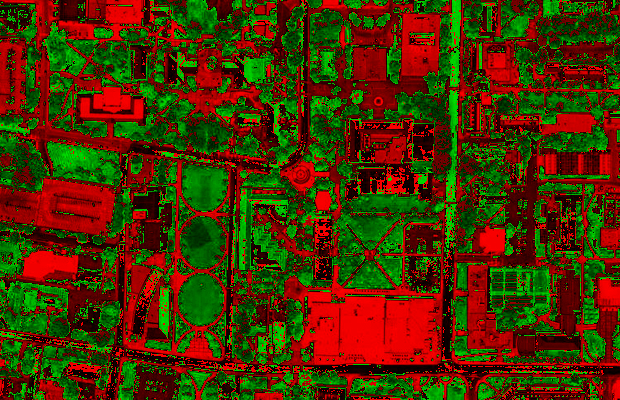

In [1]:
from PIL import Image 
from IPython.display import display 
import numpy as np
import math

# open that raster Mizzou image
pil_im = Image.open('./Mizzou.jpg') 


rgb = np.array(pil_im) # make it a np array vs. an Image object
# turn array into an Image 
rgb_im = Image.fromarray( rgb )



# get those bands => note, : means all indices (so, all spatial pixels)
red = rgb[:,:,0]
green = rgb[:,:,1]
blue = rgb[:,:,2]


# get the size of our image
xsize, ysize = red.shape

# loop over our pixels 
for i in range(xsize): # loops over one of our spatial coordinates (goes from 0 to xsize-1)
    for j in range(ysize): # loops over the other spatial coordinate -> so now, (i,j) is our pixel index
        # so, now each pixel is [i,j]
        if ( (green[i,j] < 70) or (green[i,j] > 120) ): # Amplify pixels red values that are outside of "green" threshold
            red[i,j] *=  2
            green[i,j] = 0
            blue[i,j] = 0
        elif (( red[i,j] < 140  ) or (red[i,j] > 200)): #Amplify pixels green values that are inside the given red range
            red[i,j] = 0
            green[i,j] *= 4
            blue[i,j] =  0 
        else: # Otherwise amplify the red element of the pixel
            blue[i,j] = 0        
            green[i,j] = 0
            red[i,j] *= 2 
            
# merge those color channels together and display it
display( Image.merge("RGB",(Image.fromarray(red),Image.fromarray(green),Image.fromarray(blue))) )

For HSV my algorithm is as follows:

1. Load image from file

2. Convert loaded image object into seperate hue, sat, and val arrays

3. Iterate over each pixel and use different hue, sat, and val values to determine whether a pixel should be red (not vegetation) or green (vegetation) in a false color image that is created using the red, green, and blue arrays

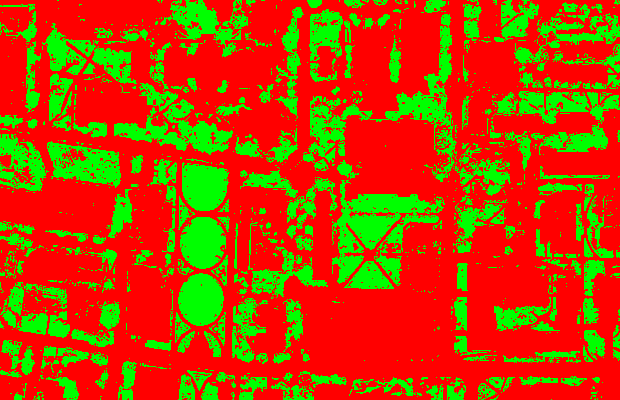

In [2]:
from PIL import Image 
from IPython.display import display 
import numpy as np
import math

# open that raster Mizzou image
pil_im = Image.open('./Mizzou.jpg') 
xsize,ysize = pil_im.size 

# lets show it
ZoomDiv = 1   # 1 is same size, < 1 is bigger, > 1 is smaller
# display( pil_im.resize((math.floor(xsize/ZoomDiv),math.floor(ysize/ZoomDiv)),Image.BICUBIC) )

rgb = np.array(pil_im) # make it a np array vs. an Image object
# turn array into an Image 
rgb_im = Image.fromarray( rgb )

# convert it into HSV
hsv_im = rgb_im.convert("HSV")

# convert it to an array
hsv = np.array( hsv_im )

# pull out of channels
hue = hsv[:,:,0]
sat = hsv[:,:,1]
val = hsv[:,:,2]

# quick allocation of data for our result!
red = hsv[:,:,0]
green = hsv[:,:,1]
blue = hsv[:,:,2]

# get the size of our image
xsize, ysize = red.shape

# loop over our pixels 
for i in range(xsize): # loops over one of our spatial coordinates (goes from 0 to xsize-1)
    for j in range(ysize): # loops over the other spatial coordinate -> so now, (i,j) is our pixel index
        # so, now each pixel is [i,j]
        if ( (val[i,j] < 70) or (val[i,j] > 110) ): # lets throw away dark values and too bright of values
            red[i,j] = 255
            green[i,j] = 0
            blue[i,j] = 0
        elif (( hue[i,j] < 140  ) or (hue[i,j] > 200)): #Set pixels with a "green hue" green in the rgb image
            red[i,j] = 0
            green[i,j] = 255
            blue[i,j] =  0 
        else: # last, anything that isn't in the above hue or value range gets set to red
            blue[i,j] = 0        
            green[i,j] = 0
            red[i,j] = 255
            
# merge those color channels together and display it
display( Image.merge("RGB",(Image.fromarray(red),Image.fromarray(green),Image.fromarray(blue))) )

Extra credit

Answer the following. (one to two paragraphs max) 

Question on "scoring"

How do you (me at that!) know if your algorithm was any good? Could I compare your output to what others found in the class? Say I wanted to declare a "class winner". Discuss some qualitative and/or qualitative ways that we could address this. 

	Many methods exist to determine how “good” an algorithm is. My first inclination is to analyze asymptotic efficiency of the algorithm but that analyzes skill of the developer and not the resultant image so that is probably not the intended meaning of “good”. To determine how good the results of the algorithm are you could run the algorithm on a dataset where what is and is not vegetation is known and compare that to what your algorithm produced. This would provide information about false positive detection as well as missed vegetation. Another method would rely on looking at obvious visual areas in the base image where there is vegetation and identifying whether the algorithm detected those areas. This method is very manual and does not have a quantitative backing, so it is hard to justify. Comparing the output of algorithms from different members of the class could be used but it seems like a problematic approach because the requirements are loose, so one person could create a false color image while another person could create a black and white image and another person may put boundaries around vegetation and another person could highlight all vegetation. Given the diversity of images that could be created from the requirements set it seems like it would be quite difficult to directly compare them and declare a winner.